In [1]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

In [2]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = "3"

In [3]:
import tensorflow as tf

print("TensorFlow object:", tf)
print("Module file:", getattr(tf, "__file__", "NO __file__ attribute"))
print("Has __version__:", hasattr(tf, "__version__"))

TensorFlow object: <module 'tensorflow' from 'c:\\Users\\hvanl\\.conda\\envs\\mlenv\\lib\\site-packages\\tensorflow\\__init__.py'>
Module file: c:\Users\hvanl\.conda\envs\mlenv\lib\site-packages\tensorflow\__init__.py
Has __version__: True


In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np

print("TF Version : ", tf.__version__)
print("Hub Version : ", hub.__version__)

# Check for GPU
print("GPU", "Available (YESS!!!)" if tf.config.list_physical_devices("GPU") else "Not Available :(")

c:\Users\hvanl\.conda\envs\mlenv\lib\site-packages\tensorflow_hub\__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version



TF Version :  2.20.0
Hub Version :  0.16.1
GPU Not Available :(


In [5]:
labels_df = pd.read_csv("data/dog-breed-identification/labels.csv")
labels_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [6]:
labels_df.describe()

,id,breed
count,10222,10222
unique,10222,120
top,fff43b07992508bc822f33d8ffd902ae,scottish_deerhound
freq,1,126


<Axes: xlabel='breed'>

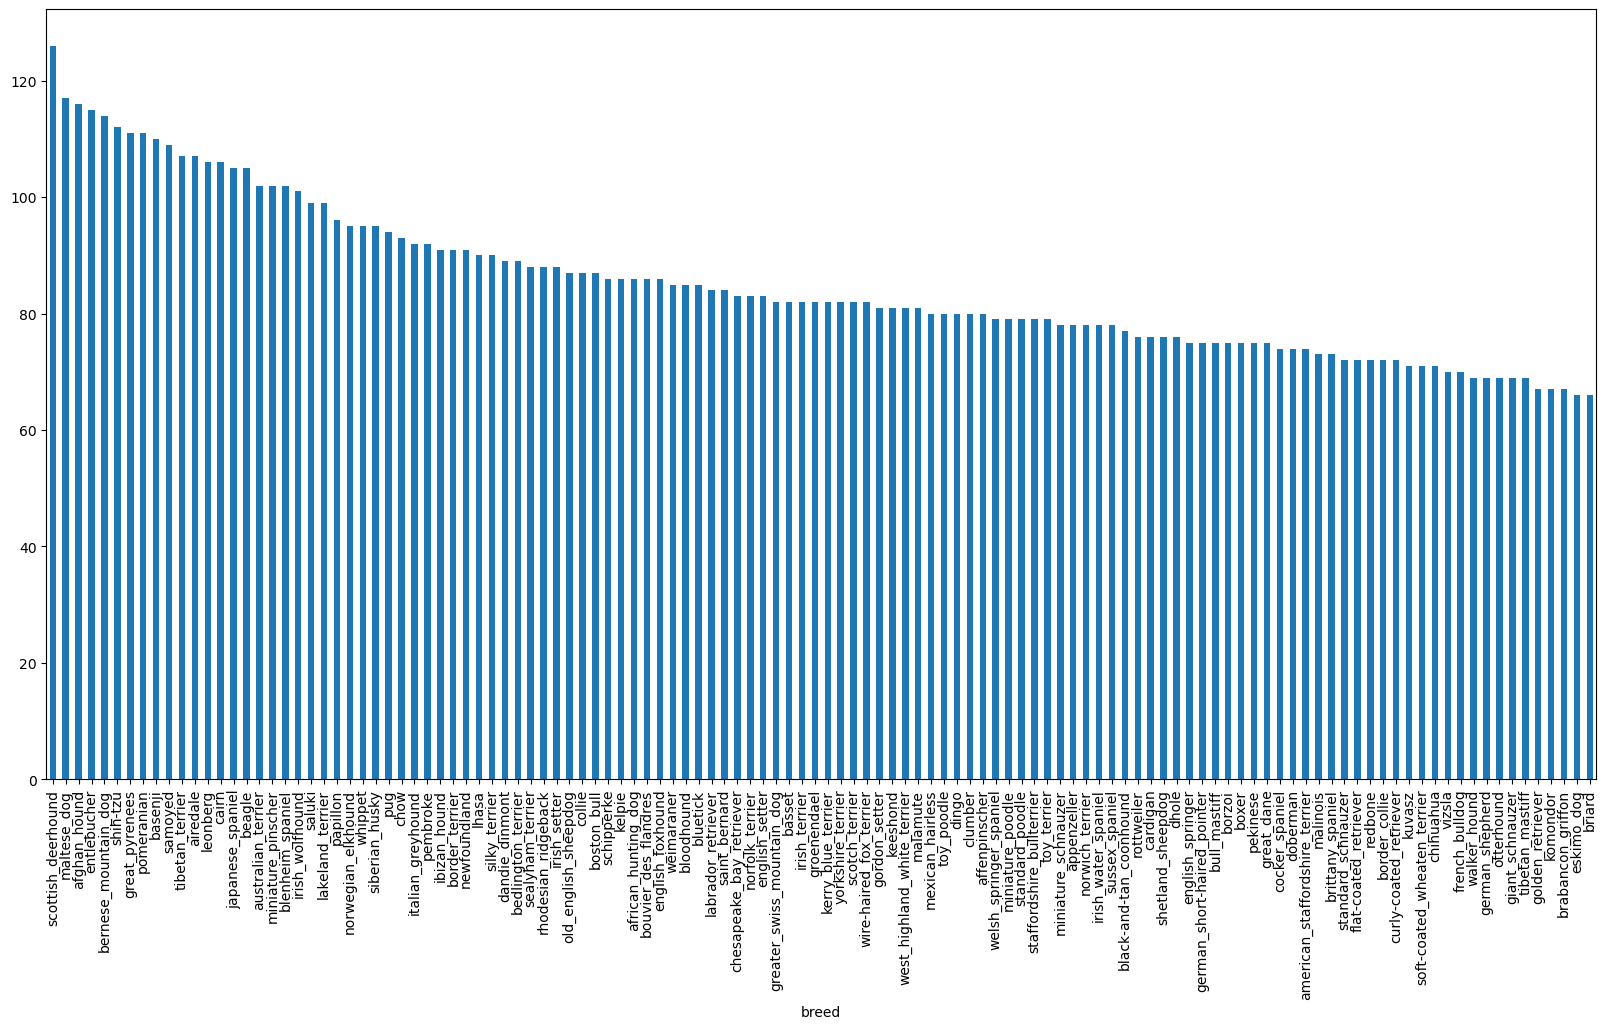

In [7]:
labels_df.breed.value_counts().plot.bar(figsize=(20, 10))


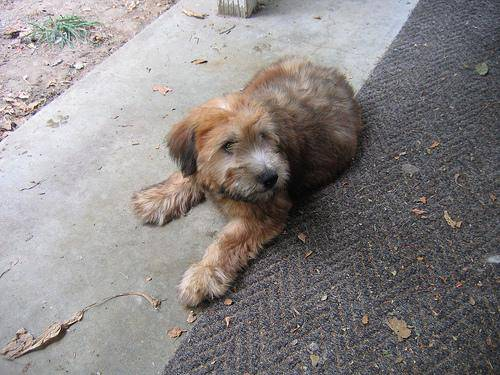

In [8]:
from IPython.display import display, Image
Image("data/dog-breed-identification/test/0a2b5dcf7aac8c4a282ed09b8b5e93f2.jpg")

In [9]:
import os
files = os.listdir("data/dog-breed-identification/train/")
filepaths = [f"data/dog-breed-identification/train/{file}" for file in files]
filepaths[:5]

['data/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'data/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'data/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'data/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'data/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [10]:
if len(filepaths) == len(labels_df['id']):
    print("Filenames and file count match!! Good to go!!")
else:
    print("Make sure files and labels_df has same data")

Filenames and file count match!! Good to go!!


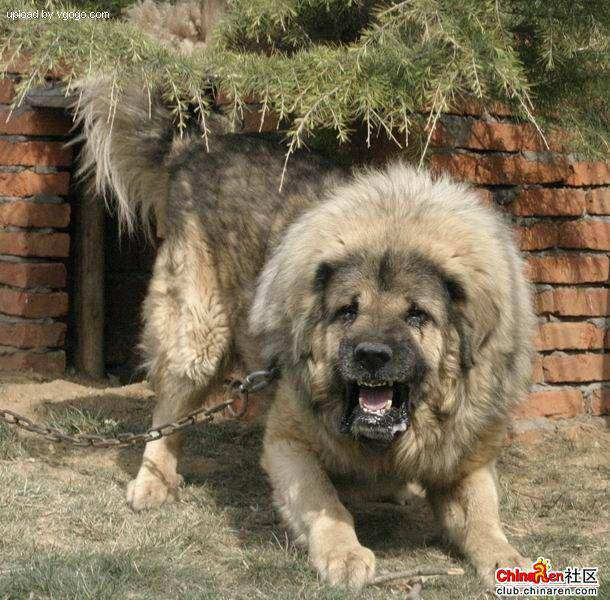

In [11]:
Image(filepaths[9000])

In [12]:
filenames = [f"data/dog-breed-identification/train/{file}.jpg" for file in labels_df['id']]
filenames[:4]


['data/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'data/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'data/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'data/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg']

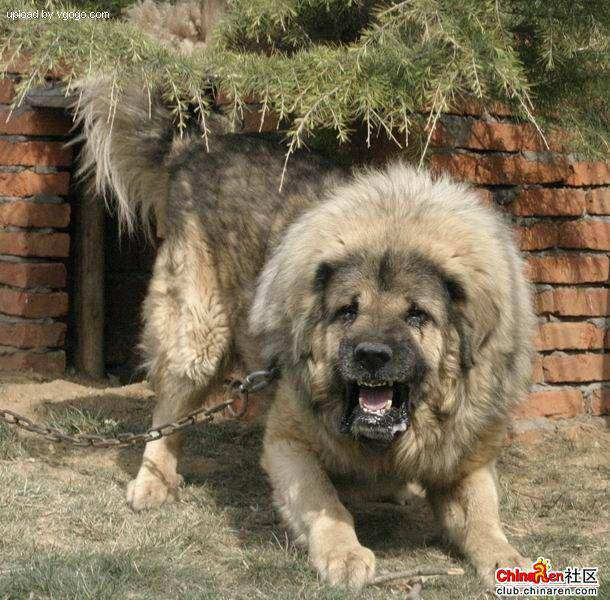

In [13]:
Image(filenames[9000])

In [14]:
labels = labels_df.breed.to_numpy()
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [15]:
if len(labels) == len(filenames):
    print("Good to go!!")
else:
    print("Go back and double check the data!!")

Good to go!!


In [16]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [17]:
print(labels[0])
print(labels[0] == unique_breeds)

boston_bull
[False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


In [18]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [19]:
print(labels[0])
print(np.where(unique_breeds == labels[0])[0][0])
print(np.argmax(boolean_labels[0]))
print(boolean_labels[0].astype(int))

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [20]:
filenames[:5]

['data/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'data/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'data/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'data/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'data/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [21]:
X = filenames
y = boolean_labels

In [22]:
NUM_IMAGES = 1000

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                 y[:NUM_IMAGES],
                                                 test_size=0.2,
                                                 random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [24]:
X_train[:4], y_train[:2]

(['data/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'data/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'data/dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'data/dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, Fa

In [25]:
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [26]:
tf.constant(image[:2])

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], shape=(2, 350, 3), dtype=uint8)>

In [27]:
IMG_SIZE = 224

def process_image(image_path):
    """
    Takes path of an image and turns it to a Tensor
    """
    image = tf.io.read_file(image_path) # Read in image file
    image = tf.image.decode_jpeg(image, channels=3) # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue) 
    image = tf.image.convert_image_dtype(image, tf.float32)  # Convert the colour channel values from 0-225 values to 0-1 values
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE]) # Resize the image to our desired size (224, 224)

    return image

In [28]:
img = process_image(filenames[42])
img.shape

TensorShape([224, 224, 3])

In [29]:
img[:2]

<tf.Tensor: shape=(2, 224, 3), dtype=float32, numpy=
array([[[0.3264178 , 0.5222886 , 0.3232816 ],
        [0.2537167 , 0.44366494, 0.24117759],
        [0.25699762, 0.4467087 , 0.23893751],
        ...,
        [0.29325107, 0.5189916 , 0.3215547 ],
        [0.29721776, 0.52466875, 0.33030328],
        [0.2948505 , 0.5223015 , 0.33406618]],

       [[0.25903144, 0.4537807 , 0.27294815],
        [0.24375686, 0.4407019 , 0.2554778 ],
        [0.2838985 , 0.47213382, 0.28298813],
        ...,
        [0.2785345 , 0.5027992 , 0.31004712],
        [0.28428748, 0.5108719 , 0.32523635],
        [0.28821915, 0.5148036 , 0.32916805]]],
      shape=(2, 224, 3), dtype=float32)>

In [30]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
    image = process_image(image_path)
    return image, label

In [31]:
get_image_label(filenames[42], boolean_labels[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [32]:
# Create Bathces 

BATCH_SIZE = 32

def create_data_batches(x,
                       y=None,
                       batch_size = BATCH_SIZE,
                       valid_data = False,
                       test_data = False):
    """
      Creates batches of data out of image (x) and label (y) pairs.
      Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
      Also accepts test data as input (no labels).
    """
    # If the data is a test set, we might not have labels
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
        data_batch = data.map(process_image).batch(batch_size)
        return data_batch

    # IF validation data we will have labels, but since we will use it to test our model we do not need to shuffle it
    if valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                 tf.constant(y)))
        data_batch = data.map(get_image_label).batch(batch_size=batch_size)
        return data_batch

    # IF train data we will have labels we want to shuffle the data

    else:
        print("Creating training data bathes...")

        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                 tf.constant(y)))
        data = data.shuffle(buffer_size=len(x))
        data_batch = data.map(get_image_label).batch(batch_size=batch_size)

        return data_batch
    

In [33]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data bathes...
Creating validation data batches...


In [34]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [35]:
import matplotlib.pyplot as plt
import math

def show_n_images(images, labels, n):
    """
    Display n number of images from data batch
    """
    # Setup the figure
    plt.figure(figsize=(10, 10))
    rows = math.ceil(n/5)

    # Loop through n to display n number of images
    for i in range(n):
        # create sublplots (n rows, 5 columns)
        ax = plt.subplot(rows, 5, i+1)
        #Display an image
        plt.imshow(images[i])
        # Add image label as the title
        plt.title(unique_breeds[labels[i].argmax()], fontsize=10)
        # Turn grid lines off
        plt.axis("off")
        

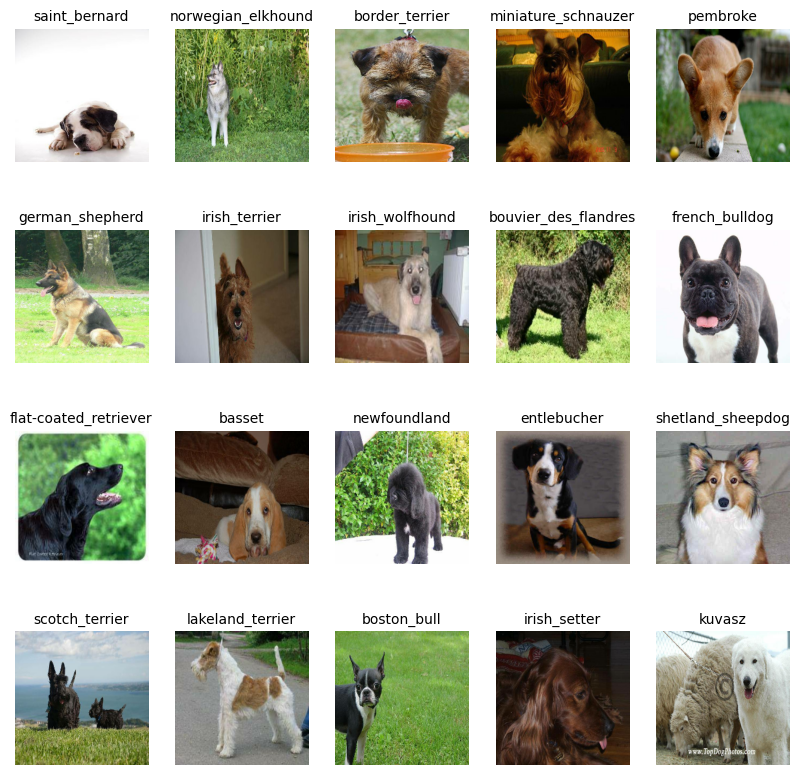

In [36]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_n_images(train_images, train_labels, 20)

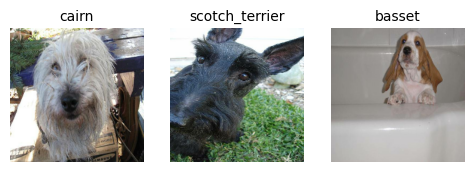

In [37]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_n_images(val_images, val_labels, 3)

In [38]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [39]:
import tensorflow as tf
import tensorflow_hub as hub
import tf_keras as keras
from tf_keras import layers, models
import random

SEED = 42
os.environ["PYTHONHASHSEED"] = "0"
random.seed(SEED)
np.random.seed(SEED)
tf.keras.utils.set_random_seed(SEED)


IMG_SIZE = 224
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

OUTPUT_SHAPE = len(unique_breeds)

# Model builder

def create_model(input_shape=INPUT_SHAPE,
                 output_shape=OUTPUT_SHAPE,
                 img_size=IMG_SIZE,
                 model_url=MODEL_URL):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Resizing(img_size, img_size),
        hub.KerasLayer(model_url, trainable=False),
        layers.Dense(output_shape, activation="softmax")
    ])

    model.compile(optimizer="adam",
                 loss="categorical_crossentropy",
                 metrics=["accuracy"])
    return model
    

In [40]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [41]:
# 1. Load the TensorBoard notebook extension
%load_ext tensorboard

In [42]:
import datetime
# # 2. Create a function to build a TensorBoard callback

def create_tensorboard_callback():
    logdir = os.path.join("data/exercise1/logs",
                         datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
os.path.join("data/exercise1/logs",
                         datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

'data/exercise1/logs\\20251129-214039'

In [44]:
# Early Stopping Callback

early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                              patience=5,
                                              restore_best_weights=True)

In [45]:
print("GPU", "available (YESS!!)" if tf.config.list_physical_devices("GPU") else "Not Available :((")

GPU Not Available :((


In [46]:
NUM_EPOCHS = 100

In [47]:
def train_model():
    model = create_model()
    tensorboard = create_tensorboard_callback()

    model.fit(x=train_data,
             epochs=NUM_EPOCHS,
             validation_data=val_data,
             validation_freq=1,
             callbacks=[tensorboard, early_stopping])
    return model

In [48]:
model=train_model()
model.summary()

Epoch 1/100



25/25 [==============================] - 6s 167ms/step - loss: 4.5560 - accuracy: 0.0712 - val_loss: 3.5555 - val_accuracy: 0.2200
Epoch 2/100
25/25 [==============================] - 4s 153ms/step - loss: 1.6232 - accuracy: 0.6888 - val_loss: 2.2698 - val_accuracy: 0.4750
Epoch 3/100
25/25 [==============================] - 4s 155ms/step - loss: 0.5720 - accuracy: 0.9312 - val_loss: 1.7730 - val_accuracy: 0.5700
Epoch 4/100
25/25 [==============================] - 4s 153ms/step - loss: 0.2557 - accuracy: 0.9875 - val_loss: 1.5896 - val_accuracy: 0.6200
Epoch 5/100
25/25 [==============================] - 4s 154ms/step - loss: 0.1529 - accuracy: 0.9962 - val_loss: 1.4976 - val_accuracy: 0.6100
Epoch 6/100
25/25 [==============================] - 4s 152ms/step - loss: 0.1024 - accuracy: 0.9987 - val_loss: 1.4459 - val_accuracy: 0.6300
Epoch 7/100
25/25 [==============================] - 4s 152ms/step - loss: 0.0762 - accuracy: 1.0000 - val_loss: 1.4205 - val_accuracy: 0.6250
Epoch 8/100

In [70]:
from pathlib import Path

for p in Path("data").rglob("*tfevents*"):
    print(p)


data\exercise1\logs\20251129-161451\train\events.out.tfevents.1764454491.HASAN.32412.0.v2
data\exercise1\logs\20251129-161451\validation\events.out.tfevents.1764454503.HASAN.32412.1.v2
data\exercise1\logs\20251129-214039\train\events.out.tfevents.1764474039.HTV-ML.36608.0.v2
data\exercise1\logs\20251129-214039\validation\events.out.tfevents.1764474044.HTV-ML.36608.1.v2
data\exercise1\logs\20251130-120010\train\events.out.tfevents.1764525610.HTV-ML.30252.0.v2
data\exercise1\logs\20251130-120010\validation\events.out.tfevents.1764525615.HTV-ML.30252.1.v2


In [71]:
!taskkill /IM tensorboard.exe /F

SUCCESS: The process "tensorboard.exe" with PID 18052 has been terminated.


In [72]:
%load_ext tensorboard
%tensorboard --logdir data/exercise1/logs --port 6007


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [69]:
%tensorboard --logdir data/exercise1/logs --port 6006


In [50]:
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 106ms/step


array([[2.3735110e-03, 6.9881011e-05, 1.4799688e-03, ..., 2.5915570e-04,
        8.7754139e-05, 2.0757057e-02],
       [5.9235172e-04, 7.7146577e-04, 1.0620434e-02, ..., 1.2406679e-03,
        1.3341177e-03, 9.3058601e-04],
       [8.7346380e-05, 8.6960854e-04, 2.5399486e-04, ..., 3.7275680e-05,
        1.3337572e-04, 6.6064432e-04],
       ...,
       [2.7655829e-05, 1.3764498e-04, 1.7991468e-04, ..., 2.3663022e-05,
        1.2944140e-03, 6.6831468e-05],
       [4.5454735e-03, 7.5624010e-04, 3.4228293e-04, ..., 8.5270667e-04,
        3.5066166e-04, 5.7009086e-03],
       [2.1475516e-03, 2.1260141e-05, 1.8017612e-03, ..., 8.0894083e-03,
        1.6765225e-03, 1.7793024e-04]], shape=(200, 120), dtype=float32)

In [51]:
predictions.shape

(200, 120)

In [52]:
print(predictions[1])

[5.92351716e-04 7.71465770e-04 1.06204338e-02 5.52644627e-03
 6.03516004e-04 1.41323602e-04 6.48827702e-02 1.59150560e-03
 5.13800594e-04 2.91823031e-04 4.23454214e-03 9.81756239e-05
 4.91261831e-04 1.63928547e-04 7.33411929e-04 5.27906755e-04
 3.02388053e-03 2.11747503e-03 2.35073472e-04 9.76867857e-04
 3.45447497e-03 1.19267330e-04 4.91380197e-05 3.80792166e-03
 1.03165908e-03 5.53333026e-04 7.07743838e-02 3.10130627e-03
 8.45122922e-05 2.47262488e-03 2.13383624e-04 3.56143108e-04
 1.42647710e-03 4.43469879e-04 8.14941013e-04 8.69400799e-04
 3.59097787e-04 9.26593505e-03 1.42803486e-03 1.41410826e-04
 5.58203436e-04 4.00271820e-04 3.69884801e-04 2.95419595e-03
 1.41606070e-02 1.24865808e-02 1.40012510e-03 2.76584644e-03
 8.21318850e-02 1.68609859e-05 7.41564785e-04 1.74737186e-03
 2.52170576e-04 2.58086622e-03 5.96087985e-03 3.47095495e-03
 1.37299881e-04 2.07704864e-02 7.89344544e-04 1.20457523e-02
 8.87821137e-04 4.96478315e-05 6.52484523e-05 2.25179814e-04
 6.95846742e-03 1.931787

In [53]:
print(f"Max value of prediction: {np.max(predictions[1])}")
print(f"Sum : {np.sum(predictions[1])}")
print(f"Max index : {np.argmax(predictions[1])}")
print(f"Prediction Label : {unique_breeds[np.argmax(predictions[1])]}")
print(f"Actual Label : {unique_breeds[np.argmax(y_val[1])]}")

Max value of prediction: 0.2752886116504669
Sum : 1.0
Max index : 96
Prediction Label : scotch_terrier
Actual Label : scotch_terrier


In [56]:
def get_prediction_and_actual_label(predictions, y_true, index):
    
    return unique_breeds[np.argmax(predictions[index])], unique_breeds[np.argmax(y_true[index])]


pred_label, actual_label = get_prediction_and_actual_label(predictions, y_val, 5)
print(pred_label, actual_label)

bedlington_terrier bedlington_terrier


In [57]:
def get_pred_label(prediction_probablities):
    
    return unique_breeds[np.argmax(prediction_probablities)]


In [58]:
def unbatchify(data):
    """
      Takes a batched dataset of (image, label) Tensors and returns separate arrays of images and labels.
    """

    images = []
    labels = []

    # Loop through unbatched data

    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(label)
    return images, labels

# Unbatchify validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [59]:
validation_df = pd.DataFrame(data={'image': val_images, 'label': val_labels}, columns=["image", "label"])

In [60]:
validation_df['prediction_probabilities'] = predictions.tolist()

In [61]:
validation_df['actual_label'] = validation_df['label'].apply(lambda x: unique_breeds[np.argmax(x)])
validation_df['predicted_label'] = validation_df['prediction_probabilities'].apply(lambda x: unique_breeds[np.argmax(x)])

In [62]:
validation_df.head().T

,0,1,2,3,4
image,"[[[0.29599646, 0.43284872, 0.3056691], [0.2663...","[[[0.96018916, 0.97587544, 0.979797], [0.96172...","[[[0.5058824, 0.5019608, 0.48627454], [0.50920...","[[[0.20934875, 0.20934875, 0.17797619], [0.211...","[[[0.58321106, 0.5675248, 0.5557601], [0.57605..."
label,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, True, False, False, Fals..."
prediction_probabilities,"[0.0023735109716653824, 6.988101085880771e-05,...","[0.0005923517164774239, 0.0007714657695032656,...","[8.734637958696112e-05, 0.0008696085424162447,...","[0.004776804707944393, 0.006037015933543444, 5...","[1.8796470158122247e-06, 1.768291804182809e-05..."
actual_label,cairn,scotch_terrier,basset,bluetick,airedale
predicted_label,cairn,scotch_terrier,basset,lakeland_terrier,airedale


In [63]:
# def plot_pred(predictions_probabilities, labels, images, n=3):
#     pred_prob, true_label, image = predictions_probabilities[n], labels[n], images[n]
#     pred_label = get_prediction_label(pred_prob)

#     plt.imshow(image)
#     plt.xticks([])
#     plt.yticks([])

#     color = 'green' if pred_label == true_label else 'red'

#     plt.title("{} {:2.2f}% ({})").format(pred_label,
#                                         np.max(pred_prob)*100,
#                                         true_label,
#                                         color=color)

def plot_pred(prediction_probabilities, labels, images, n=3):
    """
      View the prediction, ground truth label and image for sample n.
      """
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
    # Get the pred label
    
    pred_label = get_pred_label(pred_prob)
    true_label = unique_breeds[np.argmax(true_label)]
    
    # Plot image & remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    
    # Change the color of the title depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
        
    else:
        color = "red"
    
    plt.title("{} {:2.2f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)




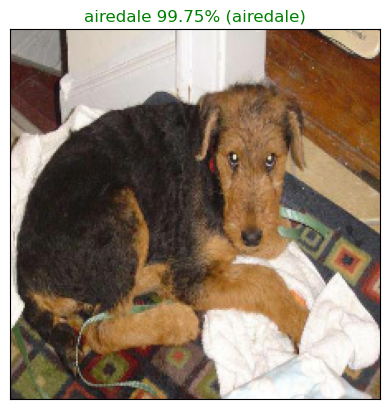

In [64]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=4)